# **3. Продвинутая оптимизация**

### Оценка качества модели для каждой комбинации гиперпараметров является дорогостоящей частью оптимизации — на приведённых крохотных сетках по нескольким параметрам это занимает минуты, но в реальных масштабах это занимает часы и сутки. Поэтому в идеале мы хотим оптимизировать гиперпараметры самым эффективным образом. 

Один из способов  — это **байесовская оптимизация**. Она отличается от случайного поиска или поиска по сетке тем, что учитывает предыдущие результаты, а не выбирает комбинации из вариантов, не имеющих информации о прошлых оценках. Во многих случаях это позволяет найти лучшие значения гиперпараметров модели за меньшее количество времени. Таким образом, мы получаем и более быструю оптимизацию, и более качественный результат. Это два желаемых результата, особенно когда мы работаем с настройкой гиперпараметров моделей МО.

Существует несколько разных алгоритмов для этого типа оптимизации, но особенно используемым является **Tree-Structured Parzen Estimators (TPE)**.

# **TREE-STRUCTURED PARZEN ESTIMATORS (TPE)**

1. На каждой итерации алгоритм TPE учитывает информацию о прошлых опробованных комбинациях гиперпараметров и только потом принимает решение, какой набор следует попробовать дальше. 

Чтобы приступить к использованию TPE, необходимо выполнить несколько итераций с помощью случайного поиска.

2. На следующем шаге происходит разделение собранных наборов на две группы:
+ в первую группу входят наборы, дающие наилучшие результаты после оценки;
+ во вторую — все остальные.

На изображении ниже: первая группа — красные точки находятся в области минимума целевой функции; вторая группа — синие точки, все остальные.

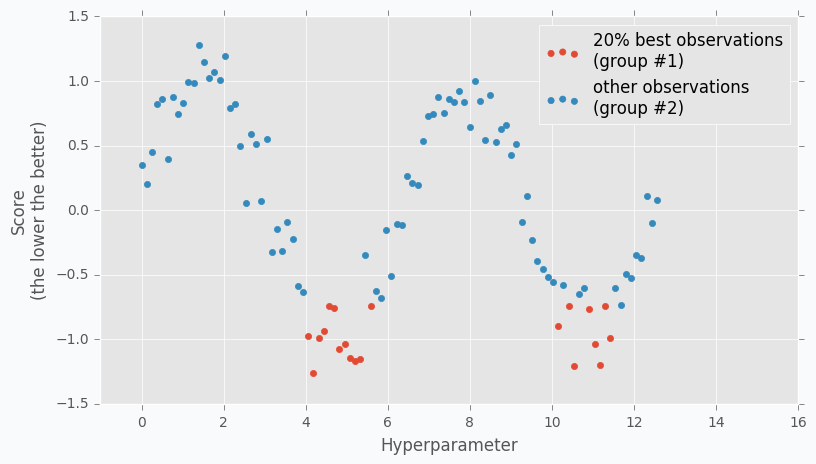

## Основная цель алгоритма — найти набор гиперпараметров, который с большей вероятностью будет в первой группе и с меньшей вероятностью во второй группе. Таким образом, для принятия следующего решения используется целое распределение наилучших комбинаций — красные точки на графике.

3. Далее TPE моделирует вероятности правдоподобия для каждой из групп, используя формулу Байеса:

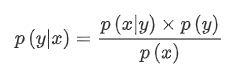

где $x$ — гиперпараметры, $y$ — соответствующая оценка качества модели.

4. Затем, используя вероятность правдоподобия из первой группы, отбирается набор комбинаций, которые с большей вероятностью попадут в первую группу и с меньшей вероятностью — во вторую. 

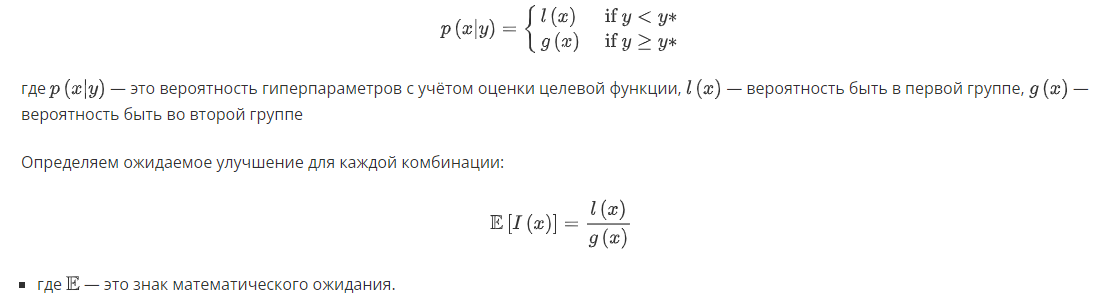

5. Шаги 2-4  будет выполняться до тех пор, пока не будет достигнуто максимальное количество итераций. 

В итоге мы найдём наилучшую комбинацию гиперпараметров.

# **HYPEROPT**

Hyperopt — это библиотека Python с открытым исходным кодом на основе байесовской оптимизации, в которой реализован алгоритм Tree-Structured Parzen Estimators (TPE).

Три шага для использования Hyperopt:

1. Задание пространства поиска гиперпараметров. 

Объявляем список гиперпараметров, тип распределения и его границы.

Основные типы:



```
hp.choice(label, options) #равновероятный выбор из множества

hp.randint(label, upper) #случайное целое число; random seed, например 

hp.uniform(label, low, high) #равномерное непрерывное распределение

hp.normal(label, mu, sigma) #нормальное непрерывное распределение

hp.lognormal(mu, sigma) #логнормальное непрерывное распределение
```
Используйте для:

+ категориальных — hp.choice;
+ целочисленных —  hp.randit, hp.quniform;
+ непрерывных — аналогично целочисленным и hp.normal, hp.uniform, hp.lognormal, hp.loguniform.



2. Задание целевой функции. 

Создаём модель МО, передаём ей данные и оцениваем её на основе выбранной метрики. Можем минимизировать/максимизировать значение метрики.

3. Задание алгоритма поиска

+ Random Search.
+ Tree of Parzen Estimators (TPE).

## Задание 3.1

С помощью каких типов методов можно задать целочисленные гиперпараметры в Hyperopt, например max_depth?

+ hp.choice
+ hp.quniform
+ hp.randint

## Задание 3.2

С помощью каких типов методов можно задать непрерывный гиперпараметр в Hyperopt, например learning_rate?

+ hp.normal, hp.uniform, hp.lognormal, hp.loguniform



## Задание 3.3

С помощью какого параметра в Hyperopt задаётся количество итераций?

+ max_evals

## Задание 3.4

Какой параметр в Hyperopt отвечает за логирование результатов прошлых итераций?

+ trials

# **OPTUNA**

Optuna — это достаточно новый фреймворк/библиотека, разработанный специально для оптимизации гиперпараметров. Помимо байесовских алгоритмов, есть возможность удаления плохих комбинаций из рассмотрения. По умолчанию алгоритм удаляет комбинации, в которых модель даёт качество ниже медианы из уже рассмотренных. Optuna помогает  быстрее находить лучшие гиперпараметры и работает с большинством современных известных библиотек ML, таких как scikit-learn, xgboost, PyTorch, TensorFlow, skorch, lightgbm, Keras, fast-ai и другими.

Три шага для использования Optuna: 

1. Задание пространства поиска гиперпараметров.

Основные функции:

+ suggest_categorical(name, choices) — для категориальных гиперпараметров;
+ suggest_int(name,low,high,step=1,log=False) — для целочисленных гиперпараметров;
+ suggest_float(name,low,high,step=None,log=False) — для непрерывных гиперпараметров;
+ suggest_uniform(name,low,high) — для целочисленных и непрерывных гиперпараметров.

С помощью необязательных аргументов step и log можно дискретизировать или взять логарифм целочисленных и непрерывных параметров.

2. Задание целевой функции. 

Создаём модель МО, передаём ей данные и оцениваем её на основе выбранной метрики, можем минимизировать/максимизировать значение метрики. На данном этапе будет обучена модель только на одной комбинации гиперпараметров.

3. Создание объекта исследования create study. 

По умолчанию используется алгоритм поиска TPE (есть и другие варианты) и вызов метода optimize(), в который передаётся целевая функция, созданная на первом шаге. Выполняется заданное n_trials раз, подставляются различные комбинации гиперпараметров.

## Задание 3.6

С помощью каких методов можно задать целочисленные гиперпараметры в Optuna, например max_depth?

+ suggest_int, suggest_uniform

## Задание 3.7

С помощью каких методов можно задать непрерывный гиперпараметр в Optuna, например learning_rate?

+ suggest_float, suggest_uniform

## Задание 3.8

Какой параметр в Optuna отвечает за направление оптимизации метрики?

+ direction

## Задание 3.9

Какой параметр в Optuna отвечает за количество итераций?

+ n_trials


# **ПЛЮСЫ И МИНУСЫ РАССМОТРЕННЫХ ФРЕЙМВОРКОВ И БИБЛИОТЕК**

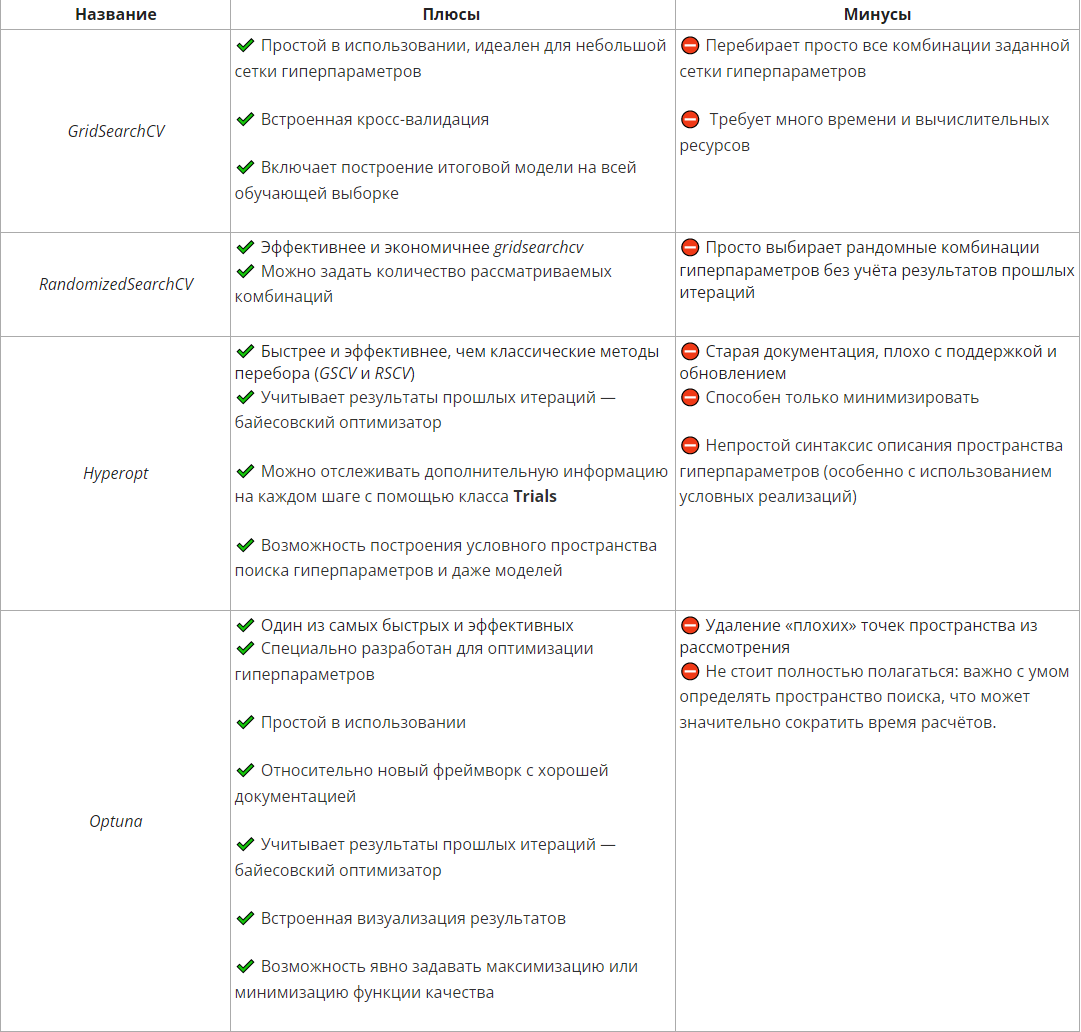